In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
try:
    df = pd.read_csv('data.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please ensure the file is in the correct directory.")
    exit()


Dataset loaded successfully.


In [9]:
print("\n--- Initial Data Inspection ---")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nValue counts for 'species':")
print(df['species'].value_counts())


--- Initial Data Inspection ---
First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Value counts for 'species':
species
setosa        50
versicolor    50
virginica  

In [10]:
X = df.drop('species', axis=1)
y = df['species']

In [11]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
target_names = le.classes_

In [12]:
print(f"\nOriginal species labels: {target_names}")
print(f"Encoded species labels (first 5): {y_encoded[:5]}")


Original species labels: ['setosa' 'versicolor' 'virginica']
Encoded species labels (first 5): [0 0 0 0 0]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

In [14]:
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (105, 4)
Testing set shape: (45, 4)


In [15]:
print("\n--- Training Initial (Unpruned) Decision Tree ---")
dt_classifier_unpruned = DecisionTreeClassifier(random_state=42)
dt_classifier_unpruned.fit(X_train, y_train)


--- Training Initial (Unpruned) Decision Tree ---


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
print("Unpruned Decision Tree model trained successfully.")

Unpruned Decision Tree model trained successfully.


In [17]:
y_pred_unpruned = dt_classifier_unpruned.predict(X_test)
accuracy_unpruned = accuracy_score(y_test, y_pred_unpruned)
f1_unpruned = f1_score(y_test, y_pred_unpruned, average='weighted') # Use 'weighted' for multi-class F1
conf_matrix_unpruned = confusion_matrix(y_test, y_pred_unpruned)
class_report_unpruned = classification_report(y_test, y_pred_unpruned, target_names=target_names)

In [18]:
print(f"\nUnpruned Model Accuracy: {accuracy_unpruned:.4f}")
print(f"Unpruned Model F1-Score (weighted): {f1_unpruned:.4f}")
print("\nUnpruned Model Confusion Matrix:\n", conf_matrix_unpruned)
print("\nUnpruned Model Classification Report:\n", class_report_unpruned)


Unpruned Model Accuracy: 0.9333
Unpruned Model F1-Score (weighted): 0.9327

Unpruned Model Confusion Matrix:
 [[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]

Unpruned Model Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45




--- Visualizing Unpruned Tree ---


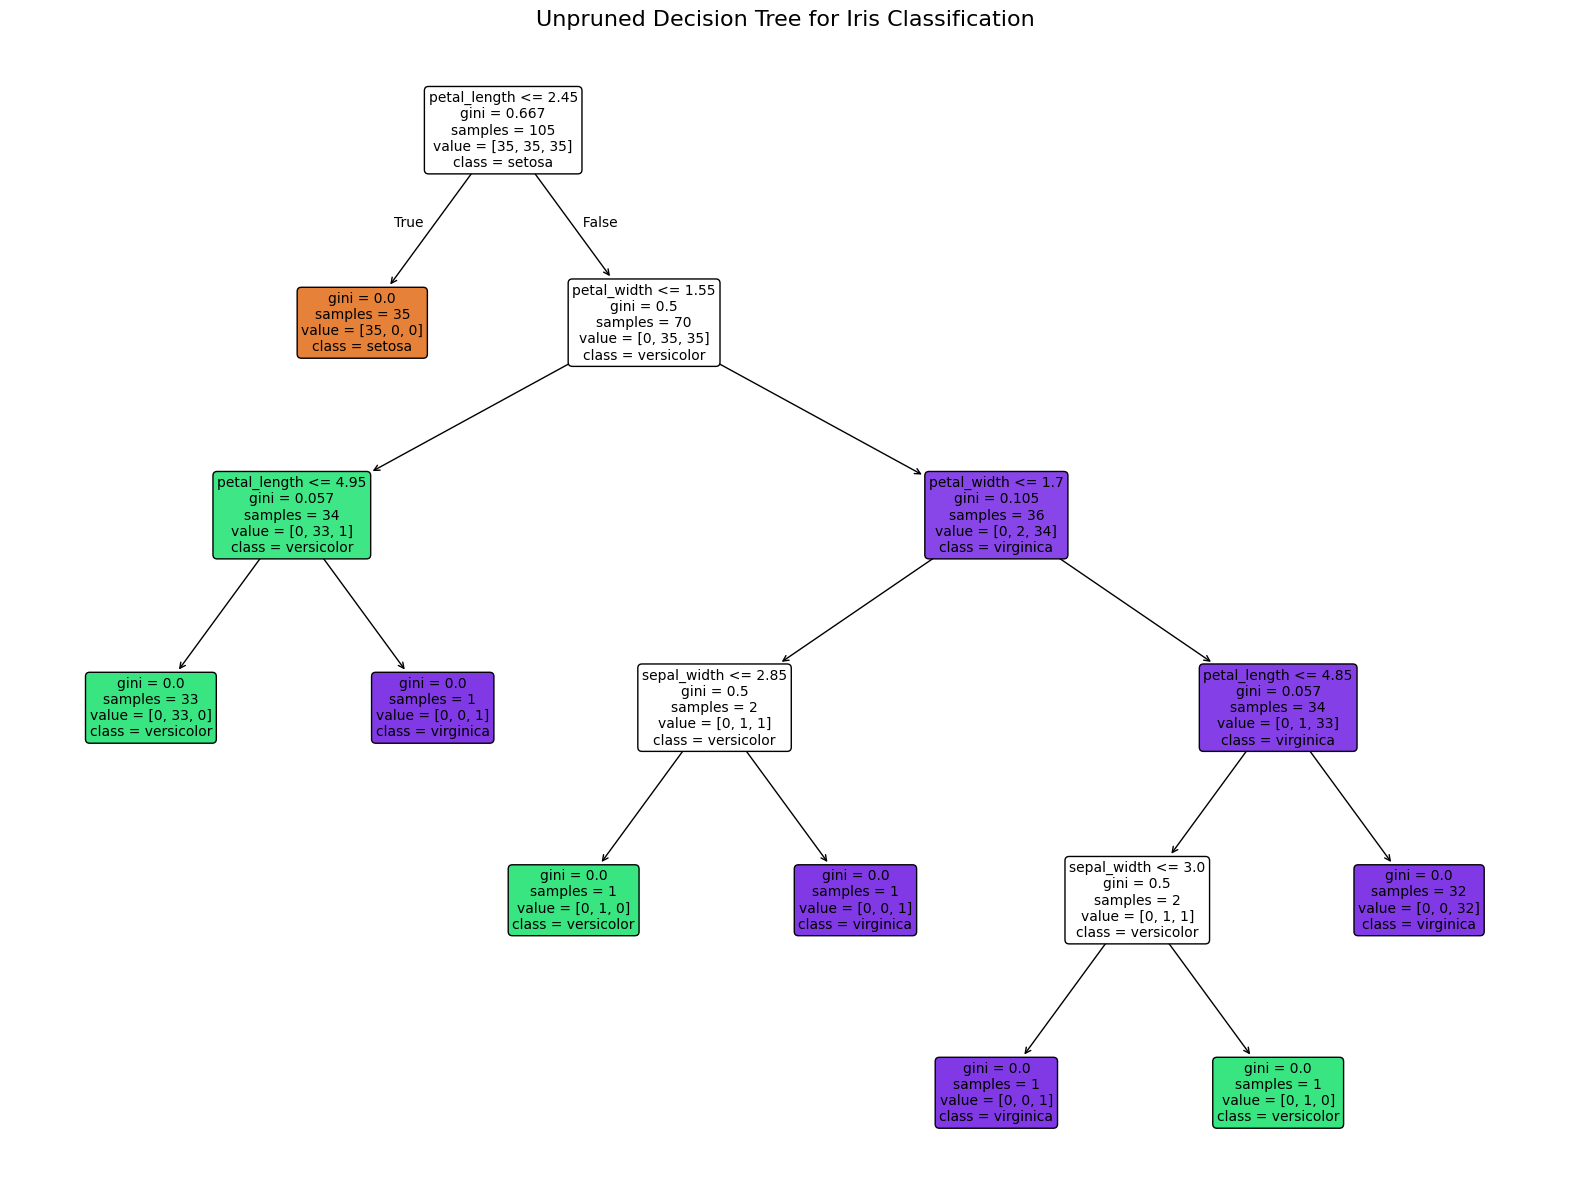

Unpruned tree visualization displayed.


In [19]:
print("\n--- Visualizing Unpruned Tree ---")
plt.figure(figsize=(20, 15))
plot_tree(dt_classifier_unpruned,
          feature_names=X.columns.tolist(),
          class_names=target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Unpruned Decision Tree for Iris Classification", fontsize=16)
plt.show()
print("Unpruned tree visualization displayed.")

In [20]:
print("\n--- Pruning the Decision Tree ---")
print("\nPruning with max_depth=3:")
dt_classifier_pruned_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier_pruned_depth.fit(X_train, y_train)


--- Pruning the Decision Tree ---

Pruning with max_depth=3:


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
y_pred_pruned_depth = dt_classifier_pruned_depth.predict(X_test)
accuracy_pruned_depth = accuracy_score(y_test, y_pred_pruned_depth)
f1_pruned_depth = f1_score(y_test, y_pred_pruned_depth, average='weighted')

In [22]:
print(f"Pruned (max_depth=3) Model Accuracy: {accuracy_pruned_depth:.4f}")
print(f"Pruned (max_depth=3) Model F1-Score (weighted): {f1_pruned_depth:.4f}")
print("\nPruned (max_depth=3) Model Classification Report:\n",
      classification_report(y_test, y_pred_pruned_depth, target_names=target_names))

Pruned (max_depth=3) Model Accuracy: 0.9778
Pruned (max_depth=3) Model F1-Score (weighted): 0.9778

Pruned (max_depth=3) Model Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



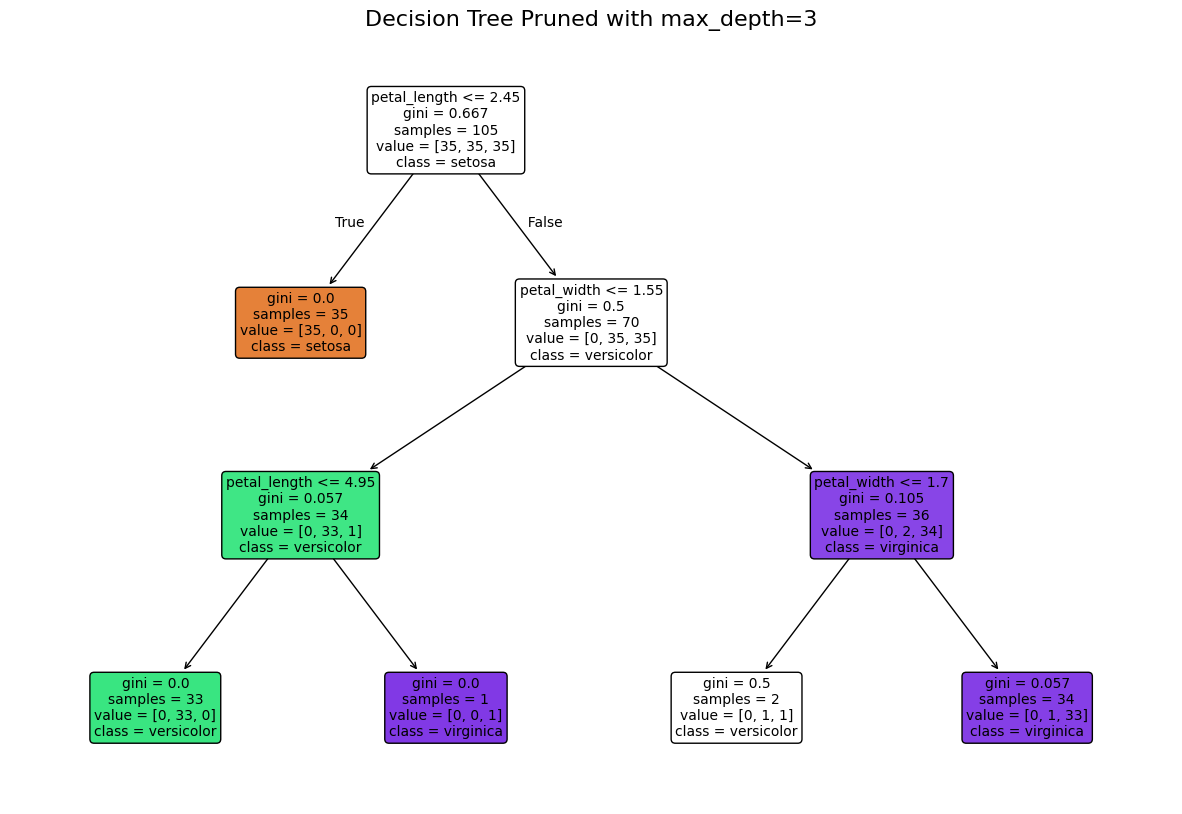

Depth-pruned tree visualization displayed.


In [23]:
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier_pruned_depth,
          feature_names=X.columns.tolist(),
          class_names=target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Pruned with max_depth=3", fontsize=16)
plt.show()
print("Depth-pruned tree visualization displayed.")

In [24]:
print("\nPruning with ccp_alpha (finding optimal alpha):")


Pruning with ccp_alpha (finding optimal alpha):


In [25]:
path = dt_classifier_unpruned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [26]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)


In [27]:
test_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

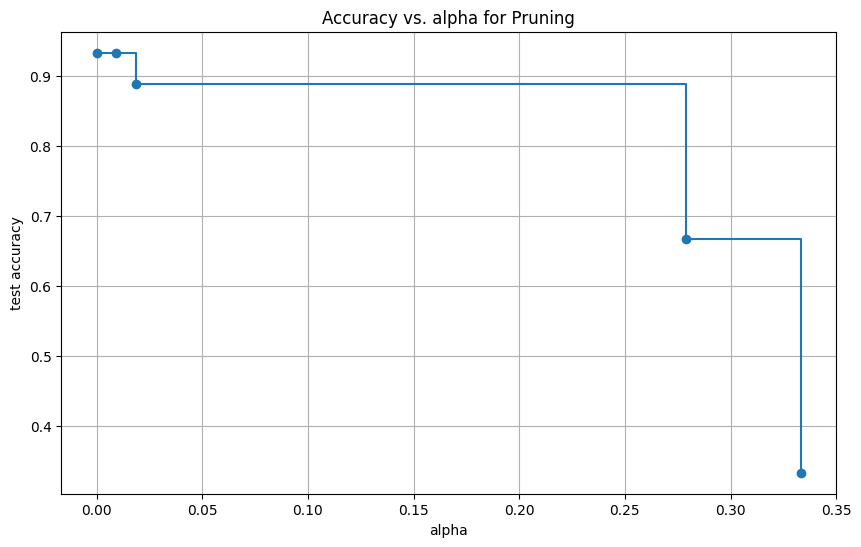

Accuracy vs. alpha plot displayed.


In [28]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, test_scores, marker='o', drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("test accuracy")
plt.title("Accuracy vs. alpha for Pruning")
plt.grid(True)
plt.show()
print("Accuracy vs. alpha plot displayed.")

In [29]:
optimal_ccp_alpha = 0.015

In [ ]:
print(f"\nPruning with optimal ccp_alpha={optimal_ccp_alpha:.4f}:")
dt_classifier_pruned_alpha = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha)
dt_classifier_pruned_alpha.fit(X_train, y_train)


Pruning with optimal ccp_alpha=0.0150:


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
y_pred_pruned_alpha = dt_classifier_pruned_alpha.predict(X_test)
accuracy_pruned_alpha = accuracy_score(y_test, y_pred_prned_alpha)
f1_pruned_alpha = f1_score(y_test, y_pred_pruned_alpha, average='weighted')

NameError: name 'dt_classifier_prned_alpha' is not defined

In [ ]:
print(f"Pruned (ccp_alpha={optimal_ccp_alpha:.4f}) Model Accuracy: {accuracy_pruned_alpha:.4f}")
print(f"Pruned (ccp_alpha={optimal_ccp_alpha:.4f}) Model F1-Score (weighted): {f1_pruned_alpha:.4f}")
print("\nPruned (ccp_alpha) Model Classification Report:\n",
      classification_report(y_test, y_pred_pruned_alpha, target_names=target_names))

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier_pruned_alpha,
          feature_names=X.columns.tolist(),
          class_names=target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title(f"Decision Tree Pruned with ccp_alpha={optimal_ccp_alpha:.4f}", fontsize=16)
plt.show()
print("ccp_alpha-pruned tree visualization displayed.")

In [ ]:
print("\n--- Summary of Model Performance ---")
print(f"Unpruned Tree Accuracy: {accuracy_unpruned:.4f}, F1-Score: {f1_unpruned:.4f}")
print(f"Pruned (max_depth=3) Tree Accuracy: {accuracy_pruned_depth:.4f}, F1-Score: {f1_pruned_depth:.4f}")
print(f"Pruned (ccp_alpha={optimal_ccp_alpha:.4f}) Tree Accuracy: {accuracy_pruned_alpha:.4f}, F1-Score: {f1_pruned_alpha:.4f}")


In [ ]:
print("\nAnalysis:")
print("Decision trees are powerful but prone to overfitting. Pruning helps simplify the tree and improve its generalization to unseen data.")
print("We demonstrated pruning using `max_depth` and `ccp_alpha`. `ccp_alpha` often provides a more principled way to prune by finding the optimal balance between complexity and accuracy.")
print("The visualizations help understand how the tree makes decisions and how pruning affects its structure.")